In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
v_adc = np.array([0.00, 0.00, 0.20, 0.40, 0.48,
                  1.36, 1.53, 2.08, 2.25, 2.24,
                  2.35, 2.70, 3.01, 3.30, 3.30,
                  3.30],
                 dtype=np.float64)

v_real = np.array([0.005, 0.015, 0.300, 0.503, 0.595,
                   1.467, 1.650, 2.271, 2.371, 2.404,
                   2.521, 2.797, 3.000, 3.273, 3.278,
                   3.298],
                  dtype=np.float64)

## Caso I

In [3]:
# Exercise E4.4
def func1(x, a, b, c, d):
    return a * x ** 3 + b * x ** 2 + c * x + d

# Exercise E4.5
# def func1(x, a, b, c, d, e, f):
#     return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

In [4]:
popt, pcov = curve_fit(func1, v_adc, v_real)

max_error = np.max(np.abs(func1(v_adc, *popt) - v_real))
rms_error = np.sqrt(np.sum(np.power(func1(v_adc, *popt) - v_real, 2)) / v_adc.shape[0])

print(f"Regression coefficients: {popt}")
print(f"Max error: {max_error:.3f}")
print(f"Quadratic mean error: {rms_error:.3f}")

Regression coefficients: [-0.00766599 -0.0191417   1.12911119  0.03456928]
Max error: 0.051
Quadratic mean error: 0.030


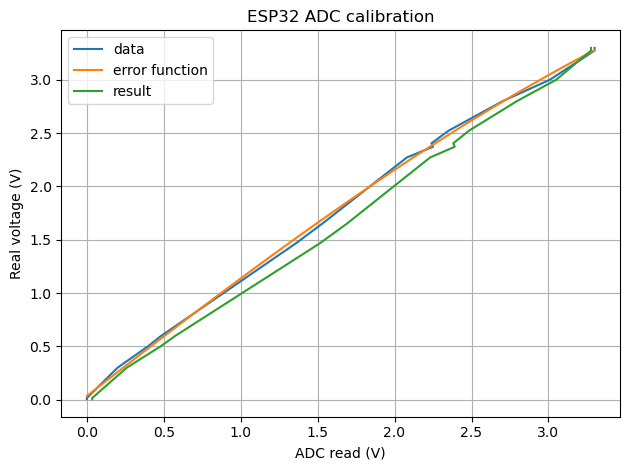

In [5]:
x = np.linspace(0.00, 3.30, 1000)

plt.plot(v_adc, v_real, label="data")

plt.plot(x, func1(x, *popt), label="error function")

plt.plot(func1(v_adc, *popt), v_real, label="result")

plt.title("ESP32 ADC calibration")
plt.xlabel("ADC read (V)")
plt.ylabel("Real voltage (V)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Caso II

In [6]:
# Example E4.5
def func2(x, a, b, c):
    return a * x ** 2 + b * x + c

# Exercise E4.6
# def func2(x, a, b, c, d, e):
#     return a * x**4 + b * x**3 + c * x**2 + d * x + e


# Exercise E4.7
# def func2(x, a, b, c):
#     return a * np.exp(b * (x + c)**2)


# Exercise E4.8
# def func2(x, a, b, c):
#     return a * np.abs(x - b) + c

In [7]:
error = v_real - v_adc

popt, pcov = curve_fit(func2, v_adc, error)

max_error = np.max(np.abs(func2(v_adc, *popt) - error))
rms_error = np.sqrt(np.sum(np.power(func2(v_adc, *popt) - error, 2)) / v_adc.shape[0])

print(f"Regression coefficients: {popt}")
print(f"Max error: {max_error:.3f}")
print(f"Quadratic mean error: {rms_error:.3f}")

Regression coefficients: [-0.05919235  0.1815789   0.0267364 ]
Max error: 0.057
Quadratic mean error: 0.031


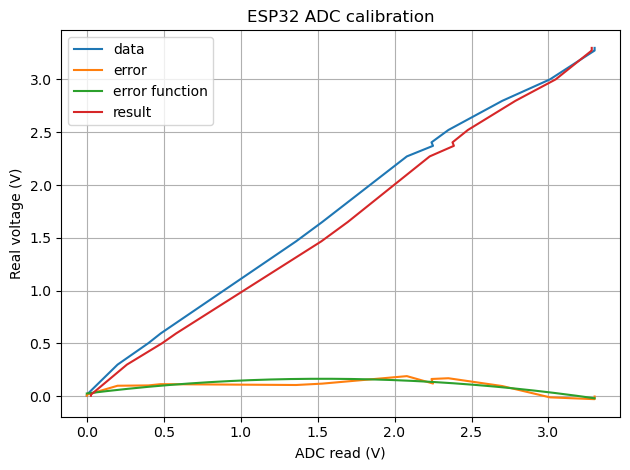

In [8]:
x = np.linspace(0.00, 3.30, 1000)

plt.plot(v_adc, v_real, label="data")
plt.plot(v_adc, error, label="error")

plt.plot(x, func2(x, *popt), label="error function")

plt.plot(v_adc + func2(v_adc, *popt), v_real, label="result")

plt.title("ESP32 ADC calibration")
plt.xlabel("ADC read (V)")
plt.ylabel("Real voltage (V)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()